<a href="https://colab.research.google.com/github/mleyvaz/AV/blob/master/Intro.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 0-Configuración

In [0]:
import numpy as np
import pandas as pd

from matplotlib import pyplot as plt

import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix

from joblib import dump, load

#1-Carga de los datos
Dataset: https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data.
![texto alternativo](https://yculz33w9skgdkhey8rajqm6-wpengine.netdna-ssl.com/wp-content/uploads/2018/11/versicolor.jpg)

In [12]:
cols = ['sepal_length', ' sepal_width', 'petal_length', 'petal_width', 'class']
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data', names=cols)
df.head()

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


# 2-Exploración y visualización de los datos

In [13]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


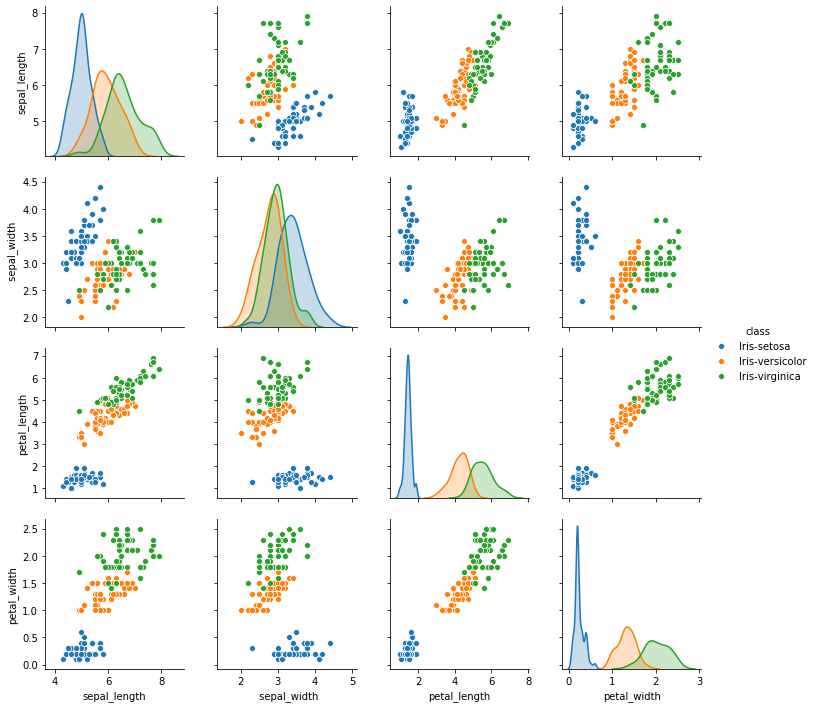

In [14]:
sns.pairplot(df, hue='class');

# Mapa de Calor
*Qué es un mapa de calor?*

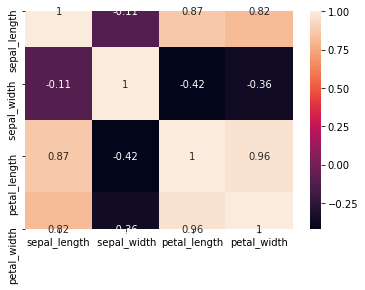

In [15]:
sns.heatmap(df.corr(), annot=True)

# Preprocesamiento de los datos

In [16]:
df['class_encod'] = df['class'].apply(lambda x: 0 if x == 'Iris-setosa' else 1 if x == 'Iris-versicolor' else 2)
df['class_encod'].unique()

array([0, 1, 2])

# Seleccion del algoritmo y entrenamiento

In [17]:
y = df[['class_encod']] # target attributes 
X = df.iloc[:, 0:4] # input attributes
X.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


## Conjunto de entramiento -conjunto de pruebas

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,
                                                    random_state=0, stratify=y)

np.shape(y_train)

(105, 1)

## Modelo K-vecinos más cercanos
*en que consiste*

In [19]:
m = KNeighborsClassifier()
m.fit(X_train, np.ravel(y_train))

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [20]:
m.predict(X_test.iloc[0:10])

array([2, 2, 0, 0, 1, 0, 1, 2, 0, 1])

## Matriz de confusión 
*Qués es la matriz de confusión*
 [Como interpretarla](https://www.i-ciencias.com/pregunta/147422/como-puedo-interpretar-la-matriz-de-confusion-de-sklearn)

In [23]:
m.score(X_test, y_test)
confusion_matrix(y_test, m.predict(X_test))

array([[15,  0,  0],
       [ 0, 15,  0],
       [ 0,  0, 15]])

# Guardar el modelo

In [22]:
dump(m, 'iris-classifier.dmp')

ic = load('iris-classifier.dmp')
confusion_matrix(y_test, ic.predict(X_test))

array([[15,  0,  0],
       [ 0, 15,  0],
       [ 0,  0, 15]])